In [12]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 1. Load QM9 with GraphConv (we just need SMILES and targets)
tasks, datasets, transformers = dc.molnet.load_qm9(featurizer='GraphConv')
train_dataset, _, _ = datasets

N = 50000
smiles_list = []
homo_values = []

# HOMO is at index 2
for i, (X, y, w, ids) in enumerate(train_dataset.iterbatches(batch_size=1, deterministic=True)):
    if i >= N:
        break
    smiles_list.append(ids[0])
    homo_values.append(y[0][2])

homo_values = np.array(homo_values)


In [6]:

# 2. Generate Morgan fingerprints
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)

X = np.array([smiles_to_fp(s) for s in tqdm(smiles_list)]).astype(float)
y = homo_values


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s][16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenerator
[16:37:23] DEPRECATION WARNING: please use MorganGenera

In [8]:

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest for HOMO
print("\n Training Random Forest for HOMO...\n")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



 Training Random Forest for HOMO...

 HOMO Prediction (Random Forest)
  MAE  = 0.7036
  RMSE = 0.9536
  R²   = 0.0801


C:\Users\deep7\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\deep7\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



📈 MAE (100 Random): 0.6385
📈 RMSE (100 Random): 0.9415
📈 R² Score (100 Random): 0.0926


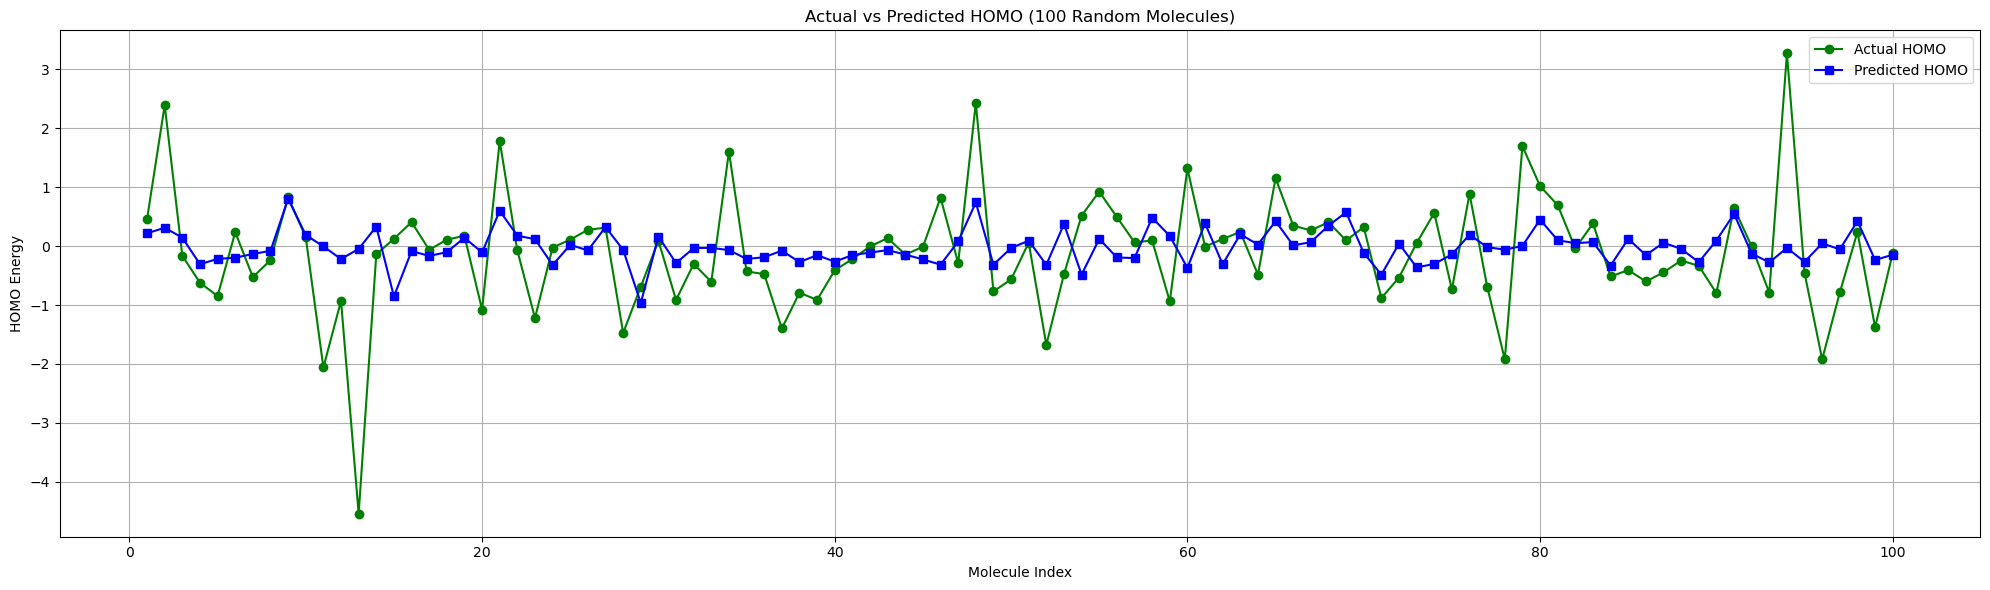

In [10]:


# 9. Predict Random 100
random_indices = random.sample(range(len(X_test)), 100)

predicted_H = []
actual_H = []

# Loop through the random indices
for i in random_indices:
    actual_H.append(y_test[i])  # True HOMO value
    predicted_H.append(y_pred[i])  # Predicted HOMO value

# 10. Metrics
mae = mean_absolute_error(actual_H, predicted_H)
rmse = mean_squared_error(actual_H, predicted_H, squared=False)
r2 = r2_score(actual_H, predicted_H)

print(f"\n📈 MAE (100 Random): {mae:.4f}")
print(f"📈 RMSE (100 Random): {rmse:.4f}")
print(f"📈 R² Score (100 Random): {r2:.4f}")

# 11. Plot
plt.figure(figsize=(20, 6))
plt.plot(range(1, 101), actual_H, label='Actual HOMO', marker='o', color='green')
plt.plot(range(1, 101), predicted_H, label='Predicted HOMO', marker='s', color='blue')
plt.xlabel("Molecule Index")
plt.ylabel("HOMO Energy")
plt.title("Actual vs Predicted HOMO (100 Random Molecules)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
